![Screenshot from 2025-07-18 19-55-09.png](<attachment:Screenshot from 2025-07-18 19-55-09.png>)
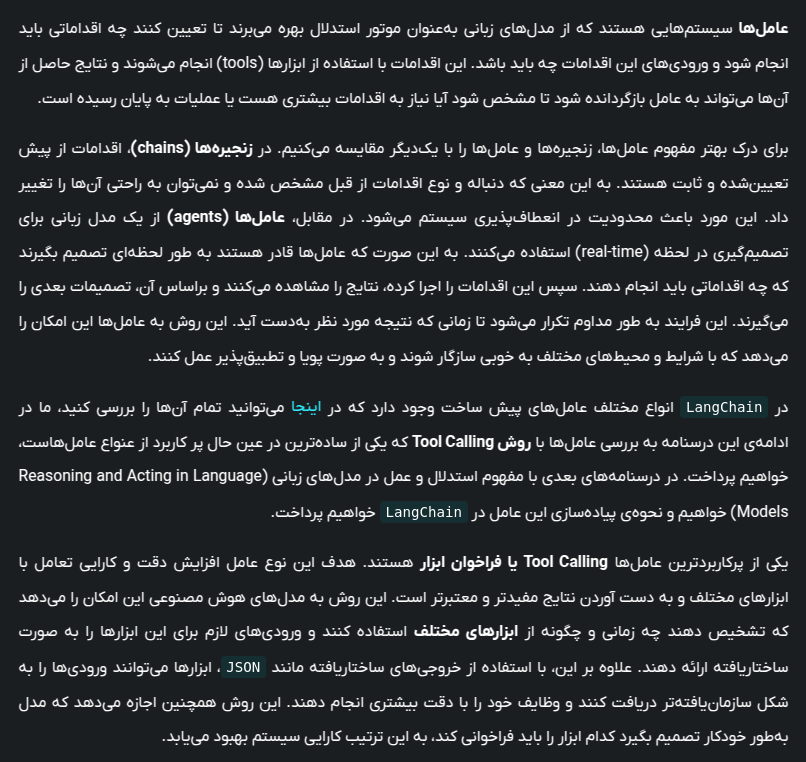

In [1]:
import getpass
import os

os.environ["COHERE_API_KEY"] = getpass.getpass()

from langchain_cohere import ChatCohere
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate

from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.tools import tool

model = ChatCohere()

In [ ]:
# nt9wg84wNjGfVEwC9ysQuAVdEJlT9bDYjtMeMA8g

In [3]:
os.environ["TAVILY_API_KEY"] = getpass.getpass()  
from langchain_community.tools.tavily_search import TavilySearchResults

search_tool = TavilySearchResults(max_results=1)
 
@tool
def multiply_tool(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


tools = [search_tool, multiply_tool]

/tmp/ipykernel_94148/2384686531.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search_tool = TavilySearchResults(max_results=1)


In [2]:
## travily
# 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

In [4]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Make sure to use the SerpAPIWrapper and multiply_tool tool for information.",
        ),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

agent = create_tool_calling_agent(model, tools, prompt)

In [6]:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke({"input": "سلام، لنگچین چیست؟"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'لنگچین چیست'}`
responded: من به این سؤال با جستجوی "لنگچین چیست" پاسخ خواهم داد.

[{'title': 'لنگچین چست؟ Langchain - وبسایت احسان غفار', 'url': 'http://ehsanghaffarii.ir/langchain/', 'content': 'لنگ\u200cچین(Langchain) یک فریمورک منبع باز است که فرآیند توسعه برنامه\u200cهای ساخته\u200cشده با LLMs را ساده\u200cتر می\u200cکند. این فریمورک مجموعه\u200cای از ابزارها و ماژول\u200cها را ارائه می\u200cدهد که پیچیدگی\u200cهای کار با LLMها را از بین می\u200cبرد و به توسعه\u200cدهندگان اجازه می\u200cدهند تا بر ساخت قابلیت\u200cهای اصلی برنامه\u200cهای خود متمرکز شوند. [...] Image 3: لنگ\u200cچین چست؟ Langchain\nلنگ\u200cچین(Langchain) یک فریمورک منبع باز است که فرآیند توسعه برنامه\u200cهای ساخته\u200cشده با LLMs را ساده\u200cتر می\u200cکند. این فریمورک مجموعه\u200cای از ابزارها\n\nDetails\n-------\n\n    نوشته\u200cشده در: آوریل ۲۰۲۴\n\nTags\n----\n\nفریمورک\n\nCopyright @ 2022 Ehsan GhaffarRSSfaceb

{'input': 'سلام، لنگچین چیست؟',
 'output': 'لنگچین (Langchain) یک فریمورک منبع باز است که فرآیند توسعه برنامه\u200cهای ساخته\u200cشده با LLMs را ساده\u200cتر می\u200cکند. این فریمورک مجموعه\u200cای از ابزارها و ماژول\u200cها را ارائه می\u200cدهد که پیچیدگی\u200cهای کار با LLMها را از بین می\u200cبرد و به توسعه\u200cدهندگان اجازه می\u200cدهد تا بر ساخت قابلیت\u200cهای اصلی برنامه\u200cهای خود متمرکز شوند.'}

In [7]:
agent_executor.invoke(
    {
        "input": "اول بهم بگو اسم من چیه؟ بعد بگو دو ضرب‌ در سیزده چند می‌شه؟ بعدشم بگو که لنگچین چیه؟",
        "chat_history": [
            HumanMessage(content="سلام، اسم من دیبا هست."),
            AIMessage(content="سلام، چجوری می‌تونم کمکتان کنم."),
            HumanMessage(content="من می‌خوام ازمایشت کنم."),
            AIMessage(content="اوه، باشه.")
        ],
    }
)



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'لنگچین'}`
responded: ابتدا به سؤال اول کاربر پاسخ می‌دهم. سپس از ابزار multiply_tool برای پاسخ به سؤال دوم استفاده می‌کنم. در نهایت، از ابزار tavily_search_results_json برای یافتن اطلاعات در مورد لنگچین استفاده می‌کنم.

[{'title': 'لنگچین (LangChain) چیست و چرا محبوب شده است؟ - آکادمی مفتاح', 'url': 'https://meftah.academy/what-is-langchain/', 'content': 'لنگ\u200cچین (LangChain) یک چارچوب متن\u200cباز است که برای توسعه برنامه\u200cهای مبتنی بر مدل\u200cهای زبانی بزرگ (LLMs) طراحی شده است. مدل\u200cهای زبانی بزرگ، مدل\u200cهای یادگیری عمیقی هستند که روی حجم عظیمی از داده\u200cها آموزش دیده\u200cاند و می\u200cتوانند به پرس\u200cوجوهای کاربران پاسخ دهند، مانند پاسخ به پرسش\u200cها یا تولید تصاویر از دستورات متنی. لنگ\u200cچین ابزارها و رویکردهای انتزاعی ارائه می\u200cدهد تا سفارشی\u200cسازی، دقت و مرتبط بودن اطلاعات تولیدشده توسط این مدل\u200cها بهبود یابد. برای مثال، توسعه\u200cدهندگان می\u2

{'input': 'اول بهم بگو اسم من چیه؟ بعد بگو دو ضرب\u200c در سیزده چند می\u200cشه؟ بعدشم بگو که لنگچین چیه؟',
 'chat_history': [HumanMessage(content='سلام، اسم من دیبا هست.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='سلام، چجوری می\u200cتونم کمکتان کنم.', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='من می\u200cخوام ازمایشت کنم.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='اوه، باشه.', additional_kwargs={}, response_metadata={})],
 'output': 'اسم شما دیبا است.\n\nدو ضرب\u200cدر سیزده می\u200cشود بیست\u200cوشش.\n\nلنگچین (LangChain) یک چارچوب متن\u200cباز است که برای توسعه برنامه\u200cهای مبتنی بر مدل\u200cهای زبانی بزرگ (LLMs) طراحی شده است. لنگچین ابزارها و رویکردهای انتزاعی ارائه می\u200cدهد تا سفارشی\u200cسازی، دقت و مرتبط بودن اطلاعات تولیدشده توسط این مدل\u200cها بهبود یابد.'}